In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime

In [2]:
records = pd.read_csv("MergedStrayCatDog_LatLong_2018.csv", encoding='latin-1')

In [3]:
records['DateTime']=pd.to_datetime(records['DateTime'])
records['month']=""
#records["DateTime"][0].month

In [4]:
records.head()

,Unnamed: 0,index,Unnamed: 0.1,Animal ID,Name,DateTime,MonthYear,Intake Type,Intake Condition,Animal Type,...,Age upon Intake,Breed,Color,Address,City,State,Address.1,Latitude,Longitude,month
0,0,0,13,A773634,Augie,2018-06-03 15:26:00,06/03/2018 03:26:00 PM,Stray,Normal,Dog,...,10 years,Dachshund Mix,Red,Braker And Ih35,Austin,TX,Braker And Ih35 Austin TX,30.377715,-97.676367,
1,1,1,19,A782291,NaN,2018-10-13 10:59:00,10/13/2018 10:59:00 AM,Stray,Normal,Dog,...,2 years,Labrador Retriever Mix,Yellow,127 North Webberville Road,Travis,TX,127 North Webberville Road Travis TX,30.276051,-97.688846,
2,2,2,23,A782085,Luna,2018-10-10 13:21:00,10/10/2018 01:21:00 PM,Stray,Normal,Dog,...,1 month,Black Mouth Cur Mix,Brown/Black,6405 South Ih 35 Frontage Road,Austin,TX,6405 South Ih 35 Frontage Road Austin TX,30.191424,-97.767135,
3,3,3,38,A783925,NaN,2018-11-08 17:56:00,11/08/2018 05:56:00 PM,Stray,Normal,Dog,...,1 year,Pit Bull,White/Black,2303 Wagon Grossing Path,Austin,TX,2303 Wagon Grossing Path Austin TX,30.192119,-97.755867,
4,4,4,46,A768476,*Fialla,2018-03-20 10:57:00,03/20/2018 10:57:00 AM,Stray,Normal,Dog,...,2 years,Smooth Fox Terrier Mix,White/Tricolor,22718 Big Sandy Drive,Travis,TX,22718 Big Sandy Drive Travis TX,30.570514,-97.949694,


In [5]:
records['month'][0] = records['DateTime'][0].month

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
s1 = pd.Series([])
for i in range(len(records)):
     s1.set_value(i, records['DateTime'][i].month)

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
records['month'] = s1

In [8]:
records.head()

,Unnamed: 0,index,Unnamed: 0.1,Animal ID,Name,DateTime,MonthYear,Intake Type,Intake Condition,Animal Type,...,Age upon Intake,Breed,Color,Address,City,State,Address.1,Latitude,Longitude,month
0,0,0,13,A773634,Augie,2018-06-03 15:26:00,06/03/2018 03:26:00 PM,Stray,Normal,Dog,...,10 years,Dachshund Mix,Red,Braker And Ih35,Austin,TX,Braker And Ih35 Austin TX,30.377715,-97.676367,6
1,1,1,19,A782291,NaN,2018-10-13 10:59:00,10/13/2018 10:59:00 AM,Stray,Normal,Dog,...,2 years,Labrador Retriever Mix,Yellow,127 North Webberville Road,Travis,TX,127 North Webberville Road Travis TX,30.276051,-97.688846,10
2,2,2,23,A782085,Luna,2018-10-10 13:21:00,10/10/2018 01:21:00 PM,Stray,Normal,Dog,...,1 month,Black Mouth Cur Mix,Brown/Black,6405 South Ih 35 Frontage Road,Austin,TX,6405 South Ih 35 Frontage Road Austin TX,30.191424,-97.767135,10
3,3,3,38,A783925,NaN,2018-11-08 17:56:00,11/08/2018 05:56:00 PM,Stray,Normal,Dog,...,1 year,Pit Bull,White/Black,2303 Wagon Grossing Path,Austin,TX,2303 Wagon Grossing Path Austin TX,30.192119,-97.755867,11
4,4,4,46,A768476,*Fialla,2018-03-20 10:57:00,03/20/2018 10:57:00 AM,Stray,Normal,Dog,...,2 years,Smooth Fox Terrier Mix,White/Tricolor,22718 Big Sandy Drive,Travis,TX,22718 Big Sandy Drive Travis TX,30.570514,-97.949694,3


In [9]:
stray_clustering = records.drop(['Intake Type','Unnamed: 0','index','Unnamed: 0.1','Animal ID','Name','DateTime','MonthYear','Address','City', 'State','Address.1','Color','Breed'],axis = 1)


In [10]:
stray_clustering.head(50)

,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Latitude,Longitude,month
0,Normal,Dog,Intact Male,10 years,30.377715,-97.676367,6
1,Normal,Dog,Intact Female,2 years,30.276051,-97.688846,10
2,Normal,Dog,Intact Female,1 month,30.191424,-97.767135,10
3,Normal,Dog,Intact Female,1 year,30.192119,-97.755867,11
4,Normal,Dog,Intact Female,2 years,30.570514,-97.949694,3
5,Normal,Cat,Intact Female,1 month,30.173212,-97.806585,7
6,Normal,Dog,Intact Male,1 year,30.443092,-97.665802,8
7,Normal,Dog,Intact Male,1 year,30.119960,-97.804373,1
8,Normal,Cat,Intact Female,1 month,30.234143,-97.722869,6
9,Normal,Dog,Spayed Female,5 years,30.220377,-97.754233,7


In [11]:
new = stray_clustering["Age upon Intake"].str.split(" ", n = 1, expand = True) 

In [12]:
for i in range(len(new)):
    if new[1][i] == 'weeks' or new[1][i] == 'week':
        new[0][i] = float(new[0][i])/52.0
    elif new[1][i] == 'months' or new[1][i] == 'month':
        new[0][i] = float(new[0][i])/12.0
    else:
        new[0][i] = new[0][i]      

In [13]:
stray_clustering["Age"]= new[0] 
stray_clustering.drop(columns =["Age upon Intake"], inplace = True) 

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Transforming sex column values using label Encoder
stray_clustering.iloc[:,0]  = label_encoder.fit_transform(stray_clustering.iloc[:,0])
stray_clustering.iloc[:,1]  = label_encoder.fit_transform(stray_clustering.iloc[:,1])
stray_clustering.iloc[:,2]  = label_encoder.fit_transform(stray_clustering.iloc[:,2])
#data_test.iloc[:,2] = label_encoder_sex.fit_transform(data_test.iloc[:,2])

In [15]:
stray_clustering.head(50)

,Intake Condition,Animal Type,Sex upon Intake,Latitude,Longitude,month,Age
0,3,1,1,30.377715,-97.676367,6,10
1,3,1,0,30.276051,-97.688846,10,2
2,3,1,0,30.191424,-97.767135,10,0.0833333
3,3,1,0,30.192119,-97.755867,11,1
4,3,1,0,30.570514,-97.949694,3,2
5,3,0,0,30.173212,-97.806585,7,0.0833333
6,3,1,1,30.443092,-97.665802,8,1
7,3,1,1,30.119960,-97.804373,1,1
8,3,0,0,30.234143,-97.722869,6,0.0833333
9,3,1,3,30.220377,-97.754233,7,5


In [16]:
df_shuffle = stray_clustering.sample(frac=1).reset_index(drop=True)
X = df_shuffle.drop('Intake Condition', axis = 1)
y = df_shuffle.drop(['Animal Type', 'Sex upon Intake', 'Latitude', 'Longitude', 'Age','month'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75)

In [17]:
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stray_clustering)
kmeans.labels_[0:10]

array([4, 0, 0, 0, 3, 1, 1, 3, 1, 4])

In [18]:
stray_clustering.head()

,Intake Condition,Animal Type,Sex upon Intake,Latitude,Longitude,month,Age
0,3,1,1,30.377715,-97.676367,6,10
1,3,1,0,30.276051,-97.688846,10,2
2,3,1,0,30.191424,-97.767135,10,0.0833333
3,3,1,0,30.192119,-97.755867,11,1
4,3,1,0,30.570514,-97.949694,3,2


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

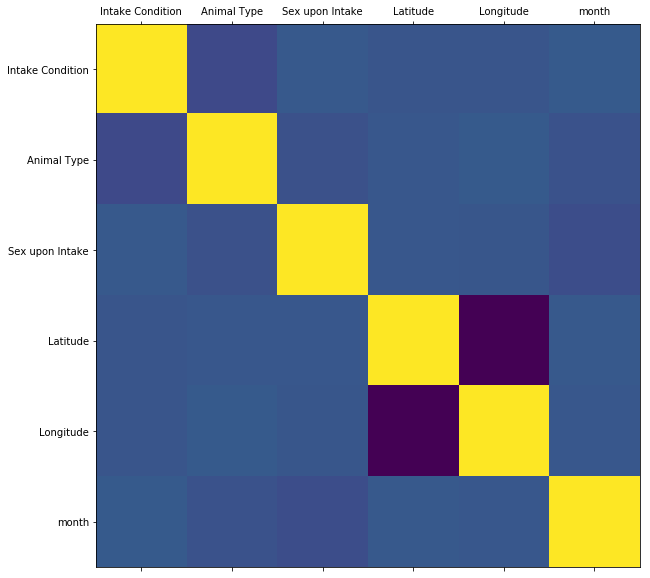

In [20]:
import matplotlib.pyplot as plt
corr = stray_clustering.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [21]:
corr

,Intake Condition,Animal Type,Sex upon Intake,Latitude,Longitude,month
Intake Condition,1.000000,-0.066051,0.015914,-0.006041,-0.006180,0.021508
Animal Type,-0.066051,1.000000,-0.027466,0.003867,0.017856,-0.021797
Sex upon Intake,0.015914,-0.027466,1.000000,0.005945,-0.001435,-0.042088
Latitude,-0.006041,0.003867,0.005945,1.000000,-0.368013,0.012923
Longitude,-0.006180,0.017856,-0.001435,-0.368013,1.000000,0.002863
month,0.021508,-0.021797,-0.042088,0.012923,0.002863,1.000000


In [22]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


90.09

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


92.04

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.67

In [26]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


54.79

In [27]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


89.7

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.88

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


99.88

In [30]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.88
6,Decision Tree,99.88
1,KNN,92.04
0,Support Vector Machines,90.09
4,Stochastic Gradient Decent,89.70
5,Linear SVC,54.79
3,Naive Bayes,12.67


In [31]:
y_test['Y_pred'] = Y_pred

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
y_test

,Intake Condition,Y_pred
1174,3,3
7367,3,3
830,3,3
59,2,3
6633,3,3
9541,3,3
7047,3,3
935,3,3
10517,3,3
5267,3,3


In [33]:
fail = 0;
tester = y_test.reset_index()
for i in range(len(tester)):
        if tester['Intake Condition'][i] != tester['Y_pred'][i]:
            fail += 1
fail_rate = fail/len(tester)*100
fail_rate

8.993576017130621

In [34]:
100-fail_rate

91.00642398286938